# Quiz 3 Starter Code

You can use this notebook to answer the questions in quiz 3, on Decision Trees and Random forests. Some starter code and hints are also provided to keep you on the right track.

Details are given in the quiz about the provenance of the data we're using. To recap what the features are:

- `median_income` is the median income in that block group
- `pct_broadband` is the percentage with access to broadband
- `pct_white` and `pct_black` are the percentage of each Census block group's population that is White and Black
- `pop_density` is the density of blockgroup (e.g. in units of population per square kilometer) 
- `max_speed` is the maximum contractual downstream speed offered by any provider in each Census block group
- `num_isp` is the number of unique ISPs that offer service in each Census block group
- `num_broadband` is the number of unique ISPs that offer service at or above 25 Mbps downstream and 3 Mbps upstream in each Census block group (This is the FCC's definition of broadband Internet access, which you can read about more in the 2019 broadband deployment report)

First, we load the dataset:

In [41]:
import pandas as pd
df = pd.read_csv("../data/fcc_acs.csv")

### Question 1

Now, train a decision tree classifier to predict if a Census block group has broadband Internet access or not (i.e., at least one ISP that offers service at or above 25 Mbps downstream and 3 Mbps upstream). Tune your classifier with a hyperparameter grid and use k-fold cross validation. 

- Divide the dataset into training and testing, with a .2 test_size. Use random_state=0 for this, and when training your classifiers.
- Use `random_state=0` when both splitting your data and training your classifiers.
- Preprocess your data by imputing missing values with the mean of the column from the training set. Note that (as you saw in the previous assignment) an administrative code is used for some missing values in `median income`, and not NaN.
- Given the size of this dataset, it will be sufficient to forgo the validation set and only separate your data into training and testing sets (i.e., use `sklearn.model_selection.test_train_split`)
- Your classifier should use the following features:
    - The ACS population characteristics described above (percentage of population that is White and Black, median income, population density)
    - The number of ISPs serving that block group
- Tune your classifier with a hyperparameter grid, using the following hyperparameter options:
    - `criterion`: `gini` or `entropy`
    - `max_depth`: 1, 3, 5
    - `min_samples_split`: 2, 5, 10
- Use K-fold cross validation with `k = 10`, using accuracy as your scoring metric.
- For scoring, use accuracy, precision, and recall.

What is the best mean test accuracy?

In [42]:
# First, divide your data into train and test sets, using random_state = 0 and a split of .2
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
train_df.head()
test_df.head(20)

,median_income,pct_broadband,pct_white,pct_black,pop_density,max_speed,num_isp,num_broadband
489,18950,0.364892,0.625130,0.037539,1.876744e+13,1.5,7,0
1063,36409,0.643396,0.266994,0.030303,9.163508e+13,10.0,8,0
2109,46888,0.613668,0.400463,0.000000,8.799963e+13,0.0,6,0
1889,42417,0.585209,0.000000,1.000000,1.415921e+13,0.0,7,0
385,61250,0.777632,0.922414,0.010536,7.830310e+13,1000.0,20,7
1296,59087,0.575621,0.009242,0.921442,3.105634e+13,0.0,7,0
1991,43971,0.536496,0.007519,0.992481,7.051950e+13,0.0,6,0
1748,51217,0.765914,0.190303,0.532727,3.758570e+13,20.0,8,0
579,41585,0.404206,0.809233,0.000000,4.303795e+13,1000.0,8,1
1491,38182,0.460674,0.513869,0.011283,2.279706e+13,45.0,10,1


In [50]:
# Next, begin to preprocess your data:

# First, for median income, replace the administrative code that indicates missing data with NaN
import numpy as np

train_df['median_income'] = train_df['median_income'].replace(-666666666, np.nan)
test_df['median_income'] = test_df['median_income'].replace(-666666666, np.nan)

# Then, fill the missing values in each column with the mean of that column from the training set
train_mean = train_df.mean()
train_df = train_df.fillna(train_mean)

test_mean = test_df.mean()
test_df = test_df.fillna(test_mean)
print("Test_mean:\n", train_mean)
print("Test_mean:\n", test_mean)

# Hints: after you do this, the mean of the median_income column in the training set should be about 60906;
# in the testing set, the median_income column should have a mean of about 57194

Test_mean:
 median_income    6.090592e+04
pct_broadband    6.163987e-01
pct_white        4.694794e-01
pct_black        3.495044e-01
pop_density      8.811193e+13
max_speed        4.719586e+02
num_isp          7.866667e+00
num_broadband    8.051282e-01
has_broadband    5.054131e-01
dtype: float64
Test_mean:
 median_income    5.696977e+04
pct_broadband    6.064401e-01
pct_white        4.488603e-01
pct_black        3.718213e-01
pop_density      2.309720e+14
max_speed        4.535353e+02
num_isp          8.129841e+00
num_broadband    9.111617e-01
has_broadband    4.920273e-01
dtype: float64


In [51]:
# The final preprocessing step will be generating your target: you're predicting whether or not a block has broadband,
# not the number of unique ISPs with broadband, which is what your data currently has.
# Create a has_broadband column in the train and test sets.
# Assign 1 to it if num_broadband is greater than 0, and 0 otherwise.
train_df['has_broadband'] = (train_df['num_broadband'] > 0).astype(int)
test_df['has_broadband'] = (test_df['num_broadband'] > 0).astype(int)


test_df.head(20)

,median_income,pct_broadband,pct_white,pct_black,pop_density,max_speed,num_isp,num_broadband,has_broadband
489,18950.000000,0.364892,0.625130,0.037539,1.876744e+13,1.5,7,0,0
1063,36409.000000,0.643396,0.266994,0.030303,9.163508e+13,10.0,8,0,0
2109,46888.000000,0.613668,0.400463,0.000000,8.799963e+13,0.0,6,0,0
1889,42417.000000,0.585209,0.000000,1.000000,1.415921e+13,0.0,7,0,0
385,61250.000000,0.777632,0.922414,0.010536,7.830310e+13,1000.0,20,7,1
1296,59087.000000,0.575621,0.009242,0.921442,3.105634e+13,0.0,7,0,0
1991,43971.000000,0.536496,0.007519,0.992481,7.051950e+13,0.0,6,0,0
1748,51217.000000,0.765914,0.190303,0.532727,3.758570e+13,20.0,8,0,0
579,41585.000000,0.404206,0.809233,0.000000,4.303795e+13,1000.0,8,1,1
1491,38182.000000,0.460674,0.513869,0.011283,2.279706e+13,45.0,10,1,1


In [60]:
# Finally, use GridSearch to tune a decision tree classifier, with has_broadband as the target
# Use 10 folds and the parameters above
# When creating your decision tree, remember to use random_state=0

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
k = 10 # Set the number of folds

params = { #Set the parameters to use for GridSearch
    'criterion': ('gini', 'entropy'),
    'max_depth': (1, 3, 5),
    'min_samples_split': (2, 5, 10)
}

# Your code to conduct your GridSearch here
features = ['pct_white', 'pct_black', 'median_income', 'pop_density', 'num_isp']
X_train = train_df[features]
y_train = train_df['has_broadband']
X_test = test_df[features]
y_test = test_df['has_broadband']


clf = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid=params, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afterwards, you can access the best score with .best_score_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Mejor modelo: {best_model}")
print(f"Mejor precisión promedio en validación cruzada: {best_score}")


Mejor modelo: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Mejor precisión promedio en validación cruzada: 0.7869220779220779


### Question 2

You should find that one of the best trees used for its splitting criterion "entropy", a max depth of 3, and a minimum sample split of 10.

For a tree trained with those parameters, what is the most important feature?

In [54]:
# Train a tree with the parameters above
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo con los parámetros especificados
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=10, random_state=0)
tree.fit(X_train, y_train)

# Then, find the feature with the highest importance
# You can access feature importances with my.feature_importances_
# Obtener las importancias de las características
importances = tree.feature_importances_

# Combinar las importancias con los nombres de las características
features_importance = dict(zip(features, importances))

# Identificar la característica más importante
most_important_feature = max(features_importance, key=features_importance.get)

print("Importancias de las características:")
print(features_importance)
print(f"Característica más importante: {most_important_feature}")


Importancias de las características:
{'pct_white': 0.0, 'pct_black': 0.0, 'median_income': 0.0, 'pop_density': 0.07593166383333902, 'num_isp': 0.924068336166661}
Característica más importante: num_isp


### Question 3

Now, you want to plot the confusion matrix for the test set for the tree with the hyperparameters above (split on entropy, max depth of 3, and min samples split of 10). Which of the following matrices corresponds to that tree?

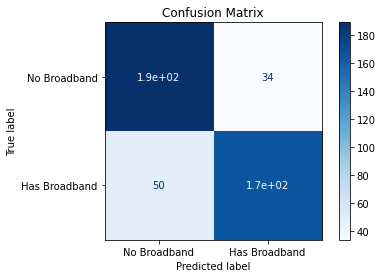

In [56]:
# Plot the confusion matrix for the tree with the hyperparameters above
# You can use sklearn.metrics.plot_confusion_matrix. It will take as parameters the tree, the test x, and test y
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Graficar la matriz de confusión
plot_confusion_matrix(tree, X_test, y_test, display_labels=["No Broadband", "Has Broadband"], cmap=plt.cm.Blues)

# Mostrar la gráfica
plt.title("Confusion Matrix")
plt.show()


### Question 4

What is the F1 score for this confusion matrix?

<img src="../assets/man_calc.PNG">

Hint:

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = $\frac{2 * precision * recall}{precision + recall} $

In [58]:
# This asks you to calculate these metrics manually
TP = 161
TN = 184
FP = 32
FN = 62

# Precision
precision = TP / (TP + FP)

# Recall 
recall = TP / (TP + FN)

# F1
f1 =  2* precision * recall / (precision + recall)

print(precision, recall, f1)

0.8341968911917098 0.7219730941704036 0.7740384615384615


### Question 5

Next, train a Random Forest classifier to predict broadband Internet deployment. As before, tune your classifier with a hyperparameter grid and use k-fold cross validation.

- Use sckit-learn's `GridSearchCV` function
- Continue to use `random_state=0` when both splitting your data and training your classifiers.
- Given the size of this dataset, it will be sufficient to forgo the validation set and only separate your data into training and testing sets (i.e., use `sklearn.model_selection.test_train_split`)
- Your classifier should use the following features:
    - The ACS population characteristics from Section 2.2 (percentage of population that is White and Black, median income, population density)
    - The number of ISPs serving that block group
- Tune your classifier with a hyperparameter grid, using the following hyperparameter options (note the differences for Random Forests):
    - `n_estimators`: 1, 10, 20 
    - `criterion`: `gini` or `entropy`
    - `max_depth`: 1, 3, 5
    - `min_samples_split`: 2, 5, 10
- Use K-fold cross validation with `k = 10`, using accuracy as your scoring metric.

Note: In practice, you may want to use thousands of estimators. We only try a few here to save time--and this may still take a few minutes. You may want to test your code first on a sample of the larger dataset.

Which combination of hyperparameters gives the best score?

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Your process will be very similar to when you did Grid Search on a decision tree
k = 10 # Set the number of folds
params = { # Set the hyperparameters
    'n_estimators': (1, 10, 20),
    'criterion': ('gini', 'entropy'),
    'max_depth': (1, 3, 5),
    'min_samples_split': (2, 5, 10)
}

# Your code to conduct your Grid Search here
# Configurar GridSearch con validación cruzada (k=10)
rf = RandomForestClassifier(random_state=0)
grid_search_rf = GridSearchCV(rf, param_grid=params, cv=10, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

# Finally, find the parameters that produced the best score (you can access with .best_params_)
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor precisión promedio: {best_score}")


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
Mejor precisión promedio: 0.799448051948052


### Question 6

So far, we've been using GridSearch and Cross-Validation (with GridSearchCV) to find the best models. Internally, this method is running "predict" on each validation fold, computing the evaluation metrics (accuracy, precision, etc.) for each fold and returning the average for the metrics. Predict uses 0.5 as the default classification threshold, meaning every observation with a probability score above 0.5 is classified as True.

In many cases, this is not ideal. Instead, we might want to choose a classification threshold ourselves, rather than use the default 0.5 cutoff. The threshold might be a fixed value (say every observation with a probability above 0.7 receives a predicted label of True). Alternatively, the threshold might be based on a percentage of the total observations. Which approach to choose will depend on your problem. Here, we will look only at the former.

One way to approach finding a good fixed threshold is to look at how different thresholds affect your evaluation metrics. You may want to choose one that optimizes for precision or recall, or one that is in a 'sweet spot' that balances nicely precision and recall.

One of the best Random Forest classifiers from the Grid Search in the previous question had the following parameters:
{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

Train a Random Forest classifier with the parameters above on your training sets, once again using `random_state=0`. Then plot a precision-recall curve using the test sets. You can use sklearn.metrics.plot_precision_recall_curve.

Which combination of precision and recall seem like a good balance that, with the right threshold, would be achievable by your Random Forest classifier?

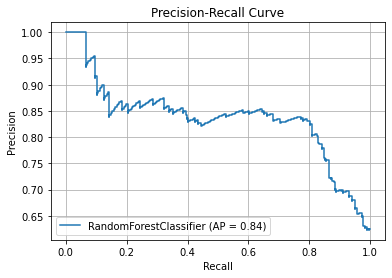

Precisión con umbral 0.8: 0.8303571428571429
Recall con umbral 0.8: 0.4305555555555556


In [74]:
# First, train a Random Forest Classifier with the parameters above
# Then, plot a precision recall curve. We import the library for you below
from sklearn.metrics import plot_precision_recall_curve 
import matplotlib.pyplot as plt

# Eyeball where we get the best precision and the best recall

from sklearn.ensemble import RandomForestClassifier

# Configurar el modelo con los parámetros dados
rf_best = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=5,
    n_estimators=100,
    random_state=0
)

# Entrenar el modelo
rf_best.fit(X_train, y_train)


# Graficar la curva de precisión-recall
disp = plot_precision_recall_curve(rf_best, X_test, y_test)

# Personalizar la gráfica
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

# Predecir probabilidades en el conjunto de prueba
y_probs = rf_best.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Aplicar un umbral personalizado
threshold = 0.8
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluar precisión y recall con el nuevo umbral
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)

print(f"Precisión con umbral {threshold}: {precision}")
print(f"Recall con umbral {threshold}: {recall}")
